In [1]:
import sys
import pandas as pd
sys.path.append(r'..\src')
import time
import random
import matplotlib.pyplot as plt
from seqfold2_0 import fold_2
from seqfold import fold

In [2]:
random.seed(23)

def generate_random_string(length):
    characters = 'ACTG'
    return ''.join(random.choice(characters) for _ in range(length))

times_fast =[]
energies_fast = []
times_original = []
energies_original = []

da =  {'Seq': [], 'time Seqfold': [], 'time Seqfold 2.0': []}
for length in [100, 200,300, 400 , 500, 600, 700, 800]:
    seq = generate_random_string(length)
    da['Seq'].append(seq)
    #Run Seqfold 2.0
    start_time = time.time()
    structs = fold_2(seq)
    da['time Seqfold 2.0'].append(time.time() - start_time )
    print('time Seqfold 2.0:', da['time Seqfold 2.0'][-1])
    
    #Run Seqfold
    start_time = time.time()
    structs = fold(seq)
    da['time Seqfold'].append(time.time() - start_time )
    print('time Seqfold:', da['time Seqfold'][-1])
    
    
df = pd.DataFrame(da)

#Save the DataFrame to a CSV file
df.to_csv('compariosn_seqfold2.csv', index=False)

time Seqfold 2.0: 0.883570671081543
time Seqfold: 1.3522121906280518
time Seqfold 2.0: 8.997501134872437
time Seqfold: 14.450804948806763
time Seqfold 2.0: 36.85168647766113
time Seqfold: 62.65338444709778
time Seqfold 2.0: 107.02140140533447
time Seqfold: 180.76219177246094
time Seqfold 2.0: 254.94648718833923
time Seqfold: 454.36369252204895
time Seqfold 2.0: 537.9578430652618
time Seqfold: 960.9457674026489
time Seqfold 2.0: 970.507759809494
time Seqfold: 1628.0060572624207
time Seqfold 2.0: 1612.0966320037842
time Seqfold: 2574.6927406787872


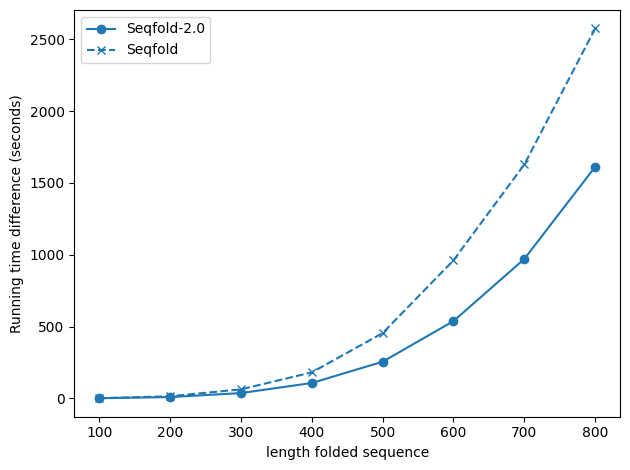

In [3]:
df = pd.read_csv(r'.\compariosn_seqfold2.csv')
x = [100, 200, 300, 400, 500, 600, 700, 800]
plt.plot(x, df['time Seqfold 2.0'],label="Seqfold-2.0", linestyle='-', marker='o', color='#1f77b4')
plt.plot(x, df['time Seqfold'], label="Seqfold", linestyle='--', marker='x', color='#1f77b4')


plt.ylabel('Running time difference (seconds)')
plt.xlabel('length folded sequence')
plt.legend()
plt.tight_layout()
#plt.savefig('running_time_difference.pdf')